<a href="https://colab.research.google.com/github/Marcelo0479/machinelearn/blob/main/Machine_learning_interpreting_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and preprocessingo the datas.

In [135]:
import pandas as pd

In [136]:
url = 'https://github.com/alura-cursos/alura-clustering-validation/raw/base-de-dados/CC%20GENERAL.csv'
df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [137]:
df.drop(columns= ['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [138]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [139]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [140]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Clustering the datas with kmeans algorithm and applying three validation methods

In [141]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, n_init= 10, max_iter=300)
labels = kmeans.fit_predict(values)

In [142]:
from sklearn import metrics

In [143]:
# Validating the clustering with Silhouette coefficient
# For this coefficiente, the closer to 1 the better
silhouette = metrics.silhouette_score(values, labels, metric= 'euclidean')
silhouette

0.36456911048578505

In [144]:
# Validating the clustering with Davies bouldin index 
# For this index, the closer to 0 the better
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075036811372195

In [145]:
# Validating the clustering with Calinski Harabasz index
# For this index, the bigger the better
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.7904873084876

# Trying to improve the valindations values changing Kmeans parameters

In [146]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters= n_clusters, n_init= 10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  silhouette = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return silhouette, dbs, calinski

In [147]:
silhouette_coeff = []
dbs_index = []
calinski_index = []
for i in range(2,20):
  _ = clustering_algorithm(i, values)
  silhouette_coeff.append(_[0])
  dbs_index.append(_[1])
  calinski_index.append(_[2])

In [148]:
def norm(valid):
  valid_norm = []
  x = min(valid)
  y = max(valid) - min(valid)
  for i in valid:
    _ = (i - x) / y
    valid_norm.append(_)
  return valid_norm

In [149]:
silhouette_coeff_norm = norm(silhouette_coeff)
dbs_index_norm = norm(dbs_index)
calinski_index_norm = norm(calinski_index)

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

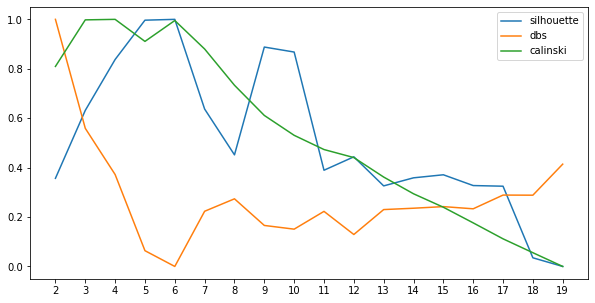

In [151]:
plt.figure(figsize=(10,5))
plt.xticks(range(2,20))
sns.lineplot(x=range(2,20), y=silhouette_coeff_norm, label= 'silhouette')
sns.lineplot(x=range(2,20), y=dbs_index_norm, label = 'dbs')
sns.lineplot(x=range(2,20), y=calinski_index_norm, label = 'calinski')

In [152]:
silhouette, dbs, calinski = clustering_algorithm(6, values)
print(silhouette, dbs, calinski)

0.36484690615539817 1.045416829410436 3523.5169999912364


In [153]:
kmeans = KMeans(n_clusters= 6, n_init= 10, max_iter=300)
labels = kmeans.fit_predict(values)

# Testing the model.

In [154]:
import numpy as np
random_data = np.random.rand(8950,16)

In [155]:
# Creating a set of random values to compare whit the original dataset
silhouette_random, dbs_random, calinsk_random = clustering_algorithm(6, random_data)
print(silhouette, dbs, calinski)
print(silhouette_random, dbs_random, calinsk_random)

0.36484690615539817 1.045416829410436 3523.5169999912364
0.0398825076905875 3.3635048027120003 281.5126076520846


In [156]:
# Splitting the original dataset in three sets to check the stability
set1, set2, set3 = np.array_split(values, 3)
silhouette_set1, dbs_set1, calinsk_set1 = clustering_algorithm(6, set1)
silhouette_set2, dbs_set2, calinsk_set2 = clustering_algorithm(6, set2)
silhouette_set3, dbs_set3, calinsk_set3 = clustering_algorithm(6, set3)
print(silhouette_set1, dbs_set1, calinsk_set1)
print(silhouette_set2, dbs_set2, calinsk_set2)
print(silhouette_set3, dbs_set3, calinsk_set3)

0.3642158840603263 1.0225836256156473 1192.3888432175581
0.3650185775574781 1.0600589407095788 1169.4779800038095
0.3721245660936028 1.0416732971239064 1184.7907452298243


# Interpreting the results

## Trying to compare features in pairs

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

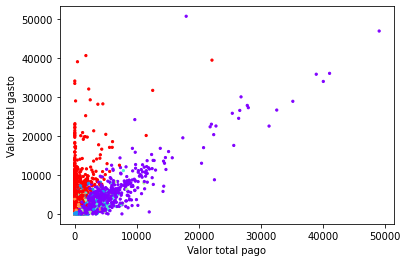

In [158]:
plt.scatter(df.PURCHASES, df.PAYMENTS, c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

In [159]:
df['cluster'] = labels

In [160]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'cluster'],
      dtype='object')

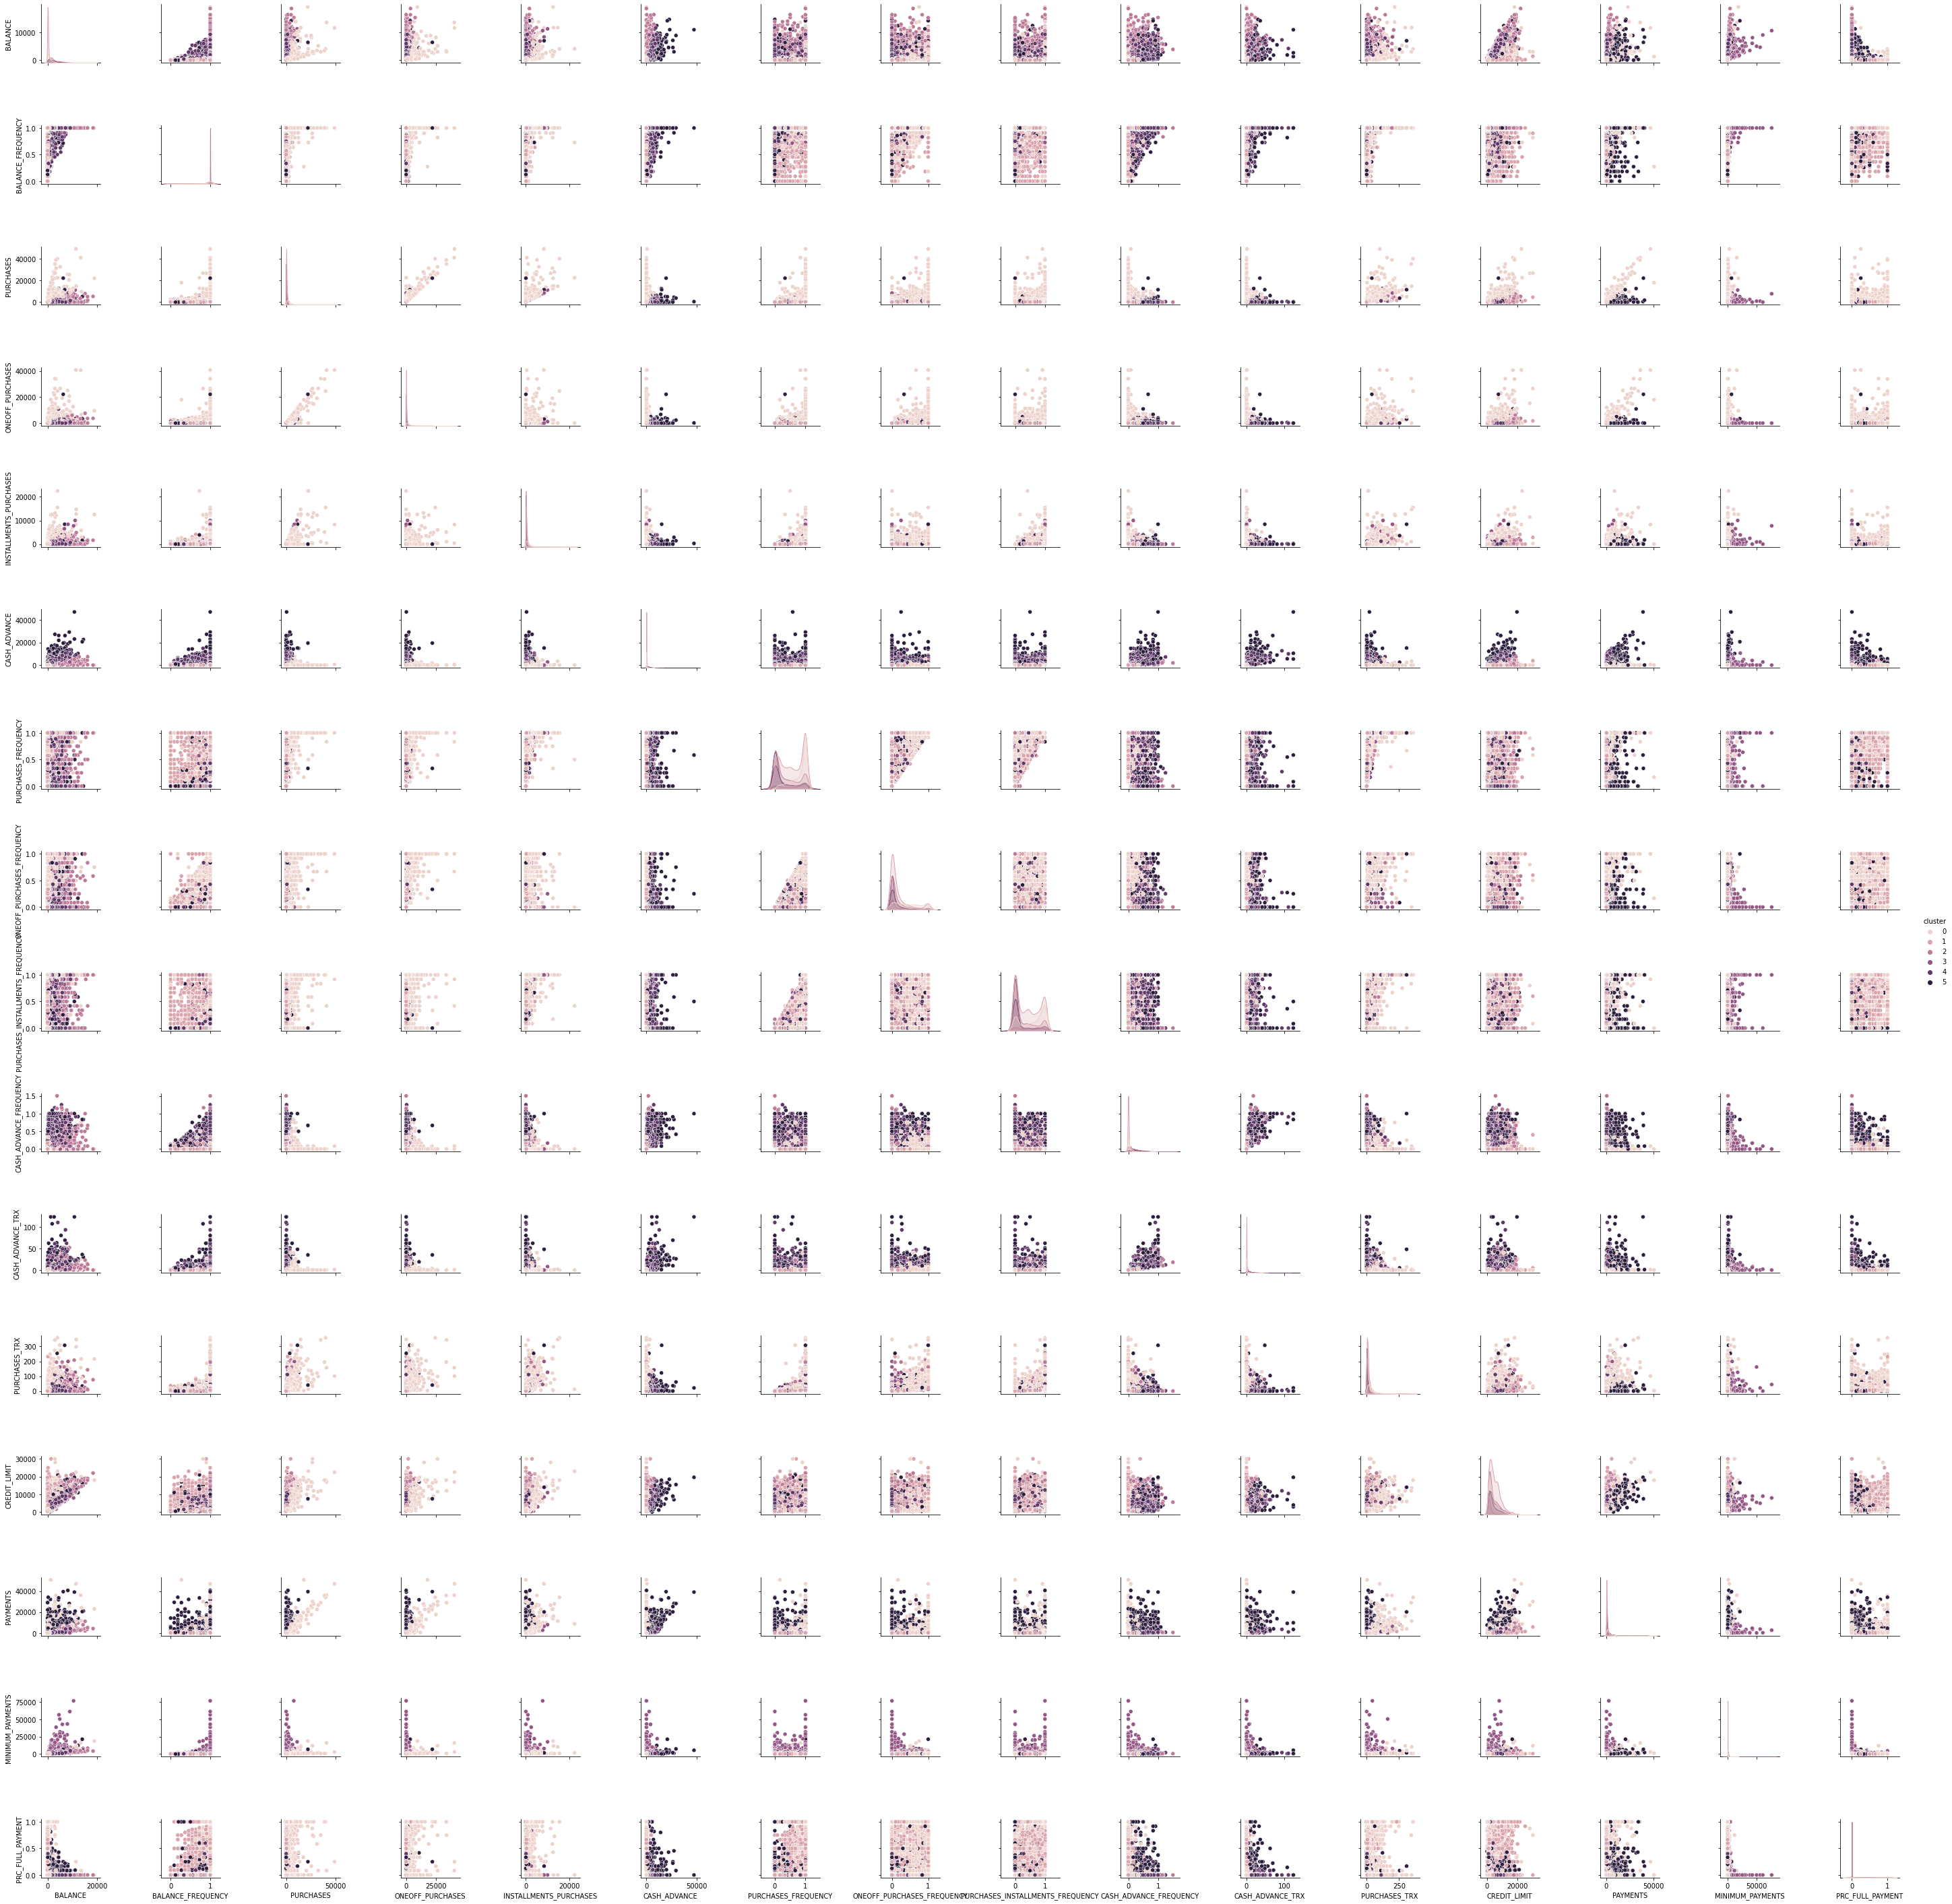

In [161]:
# Trying to compare all pair of features graphically
sns.pairplot(df[0:], hue='cluster')

In [162]:
# Trying to compare all features grouped by clusters
df.groupby('cluster').describe()

BALANCE                            ... PRC_FULL_PAYMENT                    
          count         mean          std  ...              50%       75%       max
cluster                                    ...                                     
0        1486.0  1118.416733  1649.518087  ...         0.083333  0.571429  1.000000
1        3203.0   418.043217   797.366382  ...         0.000000  0.454545  1.000000
2        1796.0  3242.269276  2630.347375  ...         0.000000  0.000000  0.090909
3         342.0  1959.062058  1816.549846  ...         0.000000  0.000000  1.000000
4        1143.0  2429.889170  2032.506183  ...         0.000000  0.000000  0.600000
5         980.0  1765.930464  2002.399798  ...         0.083333  0.166667  1.000000

[6 rows x 128 columns]

## Reducing the features with greater variance to easer the compare

In [163]:
centroids = kmeans.cluster_centers_

In [164]:
var = {}
for i in range(len(centroids[0])):
  _ = {df.columns.values[i] : round(centroids[:, i].var(), 4)}
  var.update(_)
var_series = pd.Series(var)

In [165]:
var_series.sort_values(ascending=False, inplace=True)
var_series

MINIMUM_PAYMENTS                    0.0539
CREDIT_LIMIT                        0.0348
CASH_ADVANCE                        0.0345
PAYMENTS                            0.0300
BALANCE                             0.0254
PURCHASES                           0.0183
ONEOFF_PURCHASES                    0.0070
INSTALLMENTS_PURCHASES              0.0035
BALANCE_FREQUENCY                   0.0000
PURCHASES_FREQUENCY                 0.0000
ONEOFF_PURCHASES_FREQUENCY          0.0000
PURCHASES_INSTALLMENTS_FREQUENCY    0.0000
CASH_ADVANCE_FREQUENCY              0.0000
CASH_ADVANCE_TRX                    0.0000
PURCHASES_TRX                       0.0000
PRC_FULL_PAYMENT                    0.0000
dtype: float64

In [180]:
# The feature MINIMUM_PAYMENTS, don't help us so much, then we choose the other 5 biggest features
selected_features = var_series[1:6]
selected_features

CREDIT_LIMIT    0.0348
CASH_ADVANCE    0.0345
PAYMENTS        0.0300
BALANCE         0.0254
PURCHASES       0.0183
dtype: float64

In [181]:
selected_features['PRC_FULL_PAYMENT'] = var_series['PRC_FULL_PAYMENT']

In [182]:
df.groupby('cluster')[selected_features.index].mean().round(2)

,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES,PRC_FULL_PAYMENT
cluster,,,,,,
0,4111.62,185.88,3052.73,1118.42,3330.06,0.28
1,5132.73,119.40,816.71,418.04,628.78,0.25
2,4418.18,762.76,1052.05,3242.27,519.33,0.00
3,2198.68,451.82,1339.89,1959.06,856.28,0.02
4,4475.07,3106.66,975.00,2429.89,238.96,0.01
5,3950.84,3088.66,4997.17,1765.93,528.09,0.13


In [183]:
description = df.groupby('cluster')[selected_features.index]
n_clientes = description.size()
description = description.mean().round(2)
description['n_clientes'] = n_clientes

In [184]:
description

,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES,PRC_FULL_PAYMENT,n_clientes
cluster,,,,,,,
0,4111.62,185.88,3052.73,1118.42,3330.06,0.28,1486
1,5132.73,119.40,816.71,418.04,628.78,0.25,3203
2,4418.18,762.76,1052.05,3242.27,519.33,0.00,1796
3,2198.68,451.82,1339.89,1959.06,856.28,0.02,342
4,4475.07,3106.66,975.00,2429.89,238.96,0.01,1143
5,3950.84,3088.66,4997.17,1765.93,528.09,0.13,980


In [191]:
df.groupby('cluster')[['PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS']].describe()

PRC_FULL_PAYMENT            ... MINIMUM_PAYMENTS              
                   count      mean  ...              75%           max
cluster                             ...                               
0                 1486.0  0.284290  ...       497.247095  18621.013310
1                 3203.0  0.252640  ...       238.935250   3933.230932
2                 1796.0  0.000097  ...      1464.078744   9642.502512
3                  342.0  0.022729  ...      8172.035927  76406.207520
4                 1143.0  0.008869  ...      1026.936888   8644.138069
5                  980.0  0.128571  ...       890.006121  21235.065300

[6 rows x 16 columns]

Cluster 0: The best payers, and the best buyers. Excelente customers.

Cluster 1: They use almost all credit limit and are good payers. The biggest group of customers.

Cluster 2: They buy little and usually don't make the full payment. Not good customers.

Cluster 3: The second best buyers, but they usually make de minimum payment.

Cluster 4: The worst buyers, they usually use the credit card for cash advance.

Cluster 5: Similar to group 4, they make a lot of cash advance, but they are median buyers